In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [51]:
def give_test_engine(Test_set_no,engine_id):
    import pandas as pd
    import numpy as np

    data_frame = pd.read_csv('Regression_technique_for_TurboEngine_RUL-main\Processed_Test_00{}.csv'.format(Test_set_no))
    test = data_frame[data_frame['ID']==engine_id]
    test = test.drop(columns=data_frame['ID'])

    X_test = test.iloc[:,0:-1]
    Y_test = test.iloc[:-1]

    return X_test,Y_test

In [52]:
def give_train_engine(Train_set_no,engine_id):
    import pandas as pd
    import numpy as np

    df = pd.read_csv(r'Regression_technique_for_TurboEngine_RUL-main\Processed_Train_00{}.csv'.format(Train_set_no))
    test = df[df['ID']==engine_id]
    test = test.drop(columns=['ID'])

    X_train = test.iloc[:,0:-1]
    Y_train = test.iloc[:,-1]

    return X_train,Y_train

In [33]:
df1 = pd.read_csv('Regression_technique_for_TurboEngine_RUL-main\Processed_Train_001.csv')
df2 = pd.read_csv('Regression_technique_for_TurboEngine_RUL-main\Processed_Train_002.csv')
df3 = pd.read_csv('Regression_technique_for_TurboEngine_RUL-main\Processed_Train_003.csv')
df4 = pd.read_csv('Regression_technique_for_TurboEngine_RUL-main\Processed_Train_004.csv')

In [34]:
df = pd.concat([df1,df2,df3,df4])

In [35]:
df = df.drop(columns=['ID'])

In [36]:
df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,605.33,1516.36,1315.28,404.59,2319.66,46.08,380.16,2388.73,8.4541,372,29.11,17.5234,4
61245,252,643.42,1598.92,1426.77,567.59,2388.47,48.04,535.02,2388.46,8.2221,396,39.38,23.7151,3
61246,253,643.68,1607.72,1430.56,569.04,2388.51,48.24,535.41,2388.48,8.2525,395,39.78,23.8270,2
61247,254,555.77,1381.29,1148.18,199.93,2223.78,42.53,187.92,2388.83,9.0515,337,15.26,9.0774,1


In [37]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

In [39]:
regressor = RandomForestRegressor()

In [40]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [41]:
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [42]:
from sklearn import metrics
print('RMSE on Train Set: ',np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))

print('RMSE on Test Set: ',np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))

RMSE on Train Set:  16.734308747600497
RMSE on Test Set:  53.15435902315899


RMSE on Train Set: 1 3.9530634955689754
RMSE on Train Set: 2 5.422326269214286
RMSE on Train Set: 3 14.109230671145006
RMSE on Train Set 4: 13.665523683631474


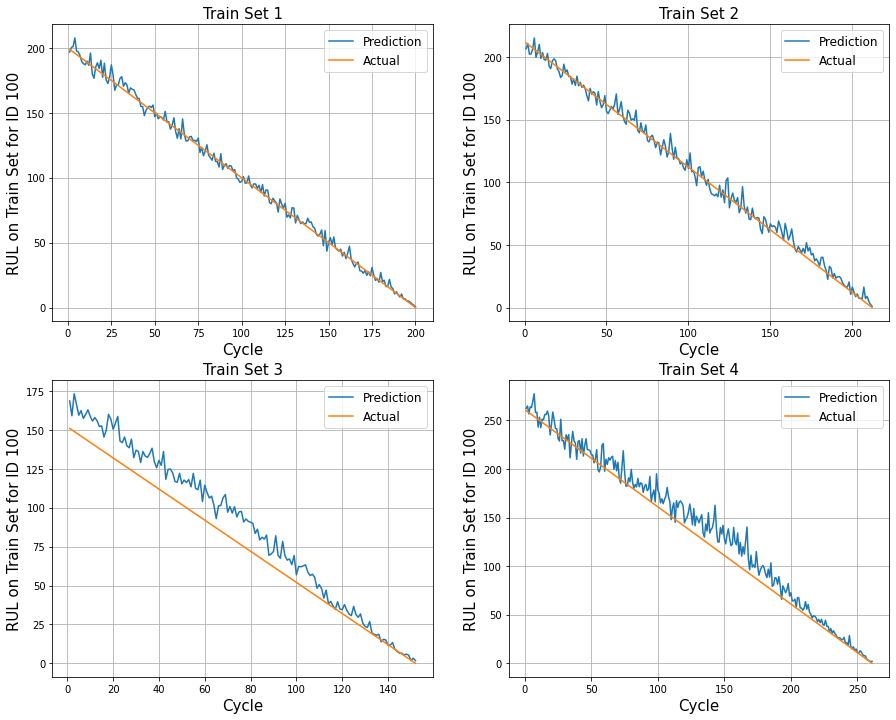

In [99]:
fig = plt.figure(figsize=(15,12))

X1,Y1 = give_train_engine(1,100)
train_set = 1
engine_id = 100
y1_pred = regressor.predict(X1)
# plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(X1['Cycle'],y1_pred)
plt.plot(X1['Cycle'],Y1)
plt.legend(['Prediction','Actual'],prop = {'size':12})
plt.xlabel('Cycle',fontsize=15)
plt.ylabel('RUL on Train Set for ID {}'.format(engine_id),fontsize=15)
plt.title('Train Set {}'.format(train_set),fontsize=15)
plt.grid()
# plt.show()
print('RMSE on Train Set: {}'.format(train_set),np.sqrt(metrics.mean_squared_error(Y1,y1_pred)))

X1,Y1 = give_train_engine(2,100)
engine_id = 100
train_set = 2
y1_pred = regressor.predict(X1)
# plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
plt.plot(X1['Cycle'],y1_pred)
plt.plot(X1['Cycle'],Y1)
plt.legend(['Prediction','Actual'],prop = {'size':12})
plt.xlabel('Cycle',fontsize=15)
plt.ylabel('RUL on Train Set for ID {}'.format(engine_id),fontsize=15)
plt.title('Train Set {}'.format(train_set),fontsize=15)
plt.grid()
# plt.show()
print('RMSE on Train Set: {}'.format(train_set),np.sqrt(metrics.mean_squared_error(Y1,y1_pred)))


X1,Y1 = give_train_engine(3,100)
engine_id = 100
train_set = 3
y1_pred = regressor.predict(X1)
# plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
plt.plot(X1['Cycle'],y1_pred)
plt.plot(X1['Cycle'],Y1)
plt.legend(['Prediction','Actual'],prop = {'size':12})
plt.xlabel('Cycle',fontsize=15)
plt.ylabel('RUL on Train Set for ID {}'.format(engine_id),fontsize=15)
plt.title('Train Set {}'.format(train_set),fontsize=15)
plt.grid()
# plt.show()
print('RMSE on Train Set: {}'.format(train_set),np.sqrt(metrics.mean_squared_error(Y1,y1_pred)))


X1,Y1 = give_train_engine(4,100)
engine_id = 100
train_set = 4
y1_pred = regressor.predict(X1)
# plt.figure(figsize=(10,5))
plt.subplot(2,2,4)

plt.plot(X1['Cycle'],y1_pred)
plt.plot(X1['Cycle'],Y1)
plt.legend(['Prediction','Actual'],prop = {'size':12})
plt.xlabel('Cycle',fontsize=15)
plt.ylabel('RUL on Train Set for ID {}'.format(engine_id),fontsize=15)
plt.title('Train Set {}'.format(train_set),fontsize=15)
plt.grid()
print('RMSE on Train Set {}:'.format(train_set),np.sqrt(metrics.mean_squared_error(Y1,y1_pred)))

plt.show()



RMSE on Test Set 1: 25.084512103581915
RMSE on Test Set 2: 37.996582741083444
RMSE on Test Set 3: 69.90980098154587
RMSE on Test Set 4: 72.53979747598653


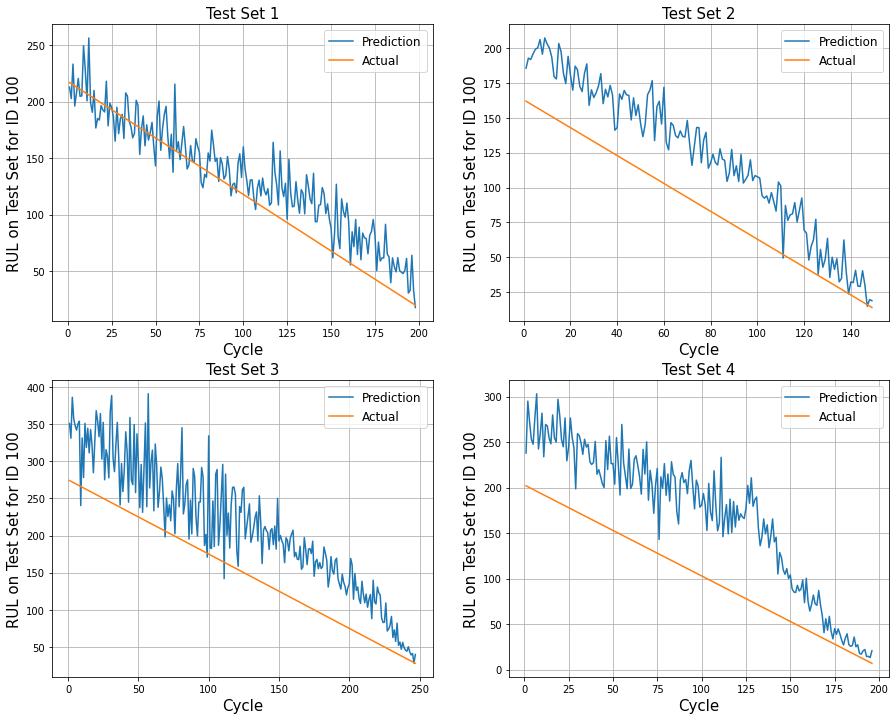

In [101]:
fig = plt.figure(figsize=(15,12))

X1,Y1 = give_test_engine(1,100)
train_set = 1
engine_id = 100
y1_pred = regressor.predict(X1)
# plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(X1['Cycle'],y1_pred)
plt.plot(X1['Cycle'],Y1)
plt.legend(['Prediction','Actual'],prop = {'size':12})
plt.xlabel('Cycle',fontsize=15)
plt.ylabel('RUL on Test Set for ID {}'.format(engine_id),fontsize=15)
plt.title('Test Set {}'.format(train_set),fontsize=15)
plt.grid()
# plt.show()
print('RMSE on Test Set {}:'.format(train_set),np.sqrt(metrics.mean_squared_error(Y1,y1_pred)))

X1,Y1 = give_test_engine(2,100)
engine_id = 100
train_set = 2
y1_pred = regressor.predict(X1)
# plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
plt.plot(X1['Cycle'],y1_pred)
plt.plot(X1['Cycle'],Y1)
plt.legend(['Prediction','Actual'],prop = {'size':12})
plt.xlabel('Cycle',fontsize=15)
plt.ylabel('RUL on Test Set for ID {}'.format(engine_id),fontsize=15)
plt.title('Test Set {}'.format(train_set),fontsize=15)
plt.grid()
# plt.show()
print('RMSE on Test Set {}:'.format(train_set),np.sqrt(metrics.mean_squared_error(Y1,y1_pred)))


X1,Y1 = give_test_engine(3,100)
engine_id = 100
train_set = 3
y1_pred = regressor.predict(X1)
# plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
plt.plot(X1['Cycle'],y1_pred)
plt.plot(X1['Cycle'],Y1)
plt.legend(['Prediction','Actual'],prop = {'size':12})
plt.xlabel('Cycle',fontsize=15)
plt.ylabel('RUL on Test Set for ID {}'.format(engine_id),fontsize=15)
plt.title('Test Set {}'.format(train_set),fontsize=15)
plt.grid()
# plt.show()
print('RMSE on Test Set {}:'.format(train_set),np.sqrt(metrics.mean_squared_error(Y1,y1_pred)))


X1,Y1 = give_test_engine(4,100)
engine_id = 100
train_set = 4
y1_pred = regressor.predict(X1)
# plt.figure(figsize=(10,5))
plt.subplot(2,2,4)

plt.plot(X1['Cycle'],y1_pred)
plt.plot(X1['Cycle'],Y1)
plt.legend(['Prediction','Actual'],prop = {'size':12})
plt.xlabel('Cycle',fontsize=15)
plt.ylabel('RUL on Test Set for ID {}'.format(engine_id),fontsize=15)
plt.title('Test Set {}'.format(train_set),fontsize=15)
plt.grid()
print('RMSE on Test Set {}:'.format(train_set),np.sqrt(metrics.mean_squared_error(Y1,y1_pred)))

plt.show()

